In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
state_abbr = ['AK', 'AL', 'AZ', 'AR', 'CA',
              'CO', 'CT', 'DE', 'FL', 'GA',
              'HI', 'ID', 'IL', 'IN', 'IA',
              'KS', 'KY', 'LA', 'ME', 'MD',
              'MA', 'MI', 'MN', 'MS', 'MO',
              'MT', 'NE', 'NV', 'NH', 'NJ',
              'NM', 'NY', 'NC', 'ND', 'OH',
              'OK', 'OR', 'PA', 'RI', 'SC',
              'SD', 'TN', 'TX', 'UT', 'VT',
              'VA', 'WA', 'WV', 'WI', 'WY'
             ]

In [50]:
deaths_true = pd.read_csv('../Data/Clean/deaths_NCHS_processed.csv')
deaths_no_travel = pd.read_csv('deceased_df_no_air_travel.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
deaths_travel = pd.read_csv('deceased_df_real_data.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]
deaths_travel_2 = pd.read_csv('deceased_df_real_data_2.csv', names=['unnamed', 'Year', 'Quarter']+state_abbr)[1:]

In [51]:
deaths_true.drop('Week', axis=1, inplace=True)
deaths_no_travel.drop('unnamed', axis=1, inplace=True)
deaths_travel.drop('unnamed', axis=1, inplace=True)
deaths_travel_2.drop('unnamed', axis=1, inplace=True)

In [73]:
deaths_true.head(3)

,State,DeathsFromPneumoniaAndInfluenza,Year,Quarter
0,AK,3.0,2009,4
1,AK,3.0,2009,4
2,AK,3.0,2009,4


In [133]:
grouped = deaths_true.groupby(['Year', 'Quarter']).sum()

In [134]:
grouped

DeathsFromPneumoniaAndInfluenza
Year Quarter                                 
2009 4                                52079.0
2010 1                                55438.0
     2                                44634.0
     3                                40001.0
     4                                48380.0
2011 1                                62435.0
     2                                47370.0
     3                                40068.0
     4                                46802.0
2012 1                                54535.0
     2                                44233.0
     3                                39655.0
     4                                48253.0
2013 1                                68417.0
     2                                44882.0
     3                                38656.0
     4                                45352.0
2014 1                                59688.0
     2                                44211.0
     3                                38166.0
     4                                51957.0
2015 1                                66007.0
     2                                45139.0
     3                                38754.0
     4                                44193.0
2016 1                                55948.0
     2                                43982.0
     3                                37702.0
     4                                44514.0
2017 1                                61708.0
     2                                43509.0
     3                                36844.0
     4                                46202.0
2018 1                                72039.0
     2                                41741.0
     3                                35404.0
     4                                41732.0
2019 1                                45254.0

In [67]:
deaths_no_travel['total_deaths'] = deaths_no_travel.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [79]:
deaths_no_travel

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,30,8,58,19,323,47,24,4,...,45,209,20,7,63,48,10,40,3,2407
2,2010,1,40,6,41,25,287,32,16,4,...,49,201,26,7,60,39,18,38,6,2349
3,2010,2,39,4,50,13,278,42,26,4,...,65,193,25,5,71,43,14,29,6,2427
4,2010,3,37,2,60,26,292,42,35,10,...,52,176,26,6,62,55,18,45,8,2339
5,2010,4,34,6,41,27,265,37,23,9,...,41,203,23,6,52,55,22,43,3,2355
6,2011,1,29,6,43,17,304,48,24,4,...,42,210,26,4,53,49,12,50,6,2286
7,2011,2,21,11,59,19,291,44,26,4,...,53,190,16,6,60,58,9,50,4,2338
8,2011,3,37,3,42,23,283,35,30,7,...,41,182,34,5,65,54,16,46,7,2277
9,2011,4,34,5,45,16,277,43,38,5,...,47,175,23,8,65,42,17,49,9,2321
10,2012,1,37,5,56,21,265,53,30,8,...,57,185,26,2,77,52,13,36,4,2410


In [65]:
deaths_travel['total_deaths'] = deaths_travel.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [66]:
deaths_travel.head(3)

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,337,52,504,224,2829,349,248,7,...,484,1874,190,46,609,499,155,419,45,23029
2,2010,1,367,64,486,195,2821,384,268,6,...,501,1860,188,56,619,509,142,434,44,23199
3,2010,2,390,52,527,248,2811,395,277,7,...,480,1946,198,51,603,502,146,454,27,23542


In [62]:
deaths_travel_2['total_deaths'] = deaths_travel_2.drop(['Year', 'Quarter'], axis=1).sum(axis=1)

In [80]:
deaths_travel_2

,Year,Quarter,AK,AL,AZ,AR,CA,CO,CT,DE,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,total_deaths
1,2009,4,349,25,460,159,2754,381,265,7,...,492,1875,196,23,614,498,25,424,17,22110
2,2010,1,310,37,503,159,2794,375,242,5,...,467,1897,224,13,591,535,9,440,15,21721
3,2010,2,339,37,470,180,2925,388,259,3,...,473,1945,208,16,580,491,11,410,14,22183
4,2010,3,341,54,473,174,2822,388,244,4,...,460,1917,216,17,627,501,31,441,12,22430
5,2010,4,303,36,462,168,2941,405,289,5,...,468,1898,216,9,626,570,10,425,13,21940
6,2011,1,337,21,486,171,2894,425,230,4,...,489,1932,226,20,603,505,10,423,17,22148
7,2011,2,333,45,482,175,2918,413,274,0,...,480,1952,203,11,613,521,11,429,37,22609
8,2011,3,322,42,454,171,2922,364,279,2,...,476,1957,203,13,685,538,40,444,21,22847
9,2011,4,333,44,472,194,2775,390,224,8,...,470,1912,208,19,618,519,27,441,14,21952
10,2012,1,358,55,510,197,2898,379,261,0,...,457,1957,191,10,647,518,19,458,12,22368


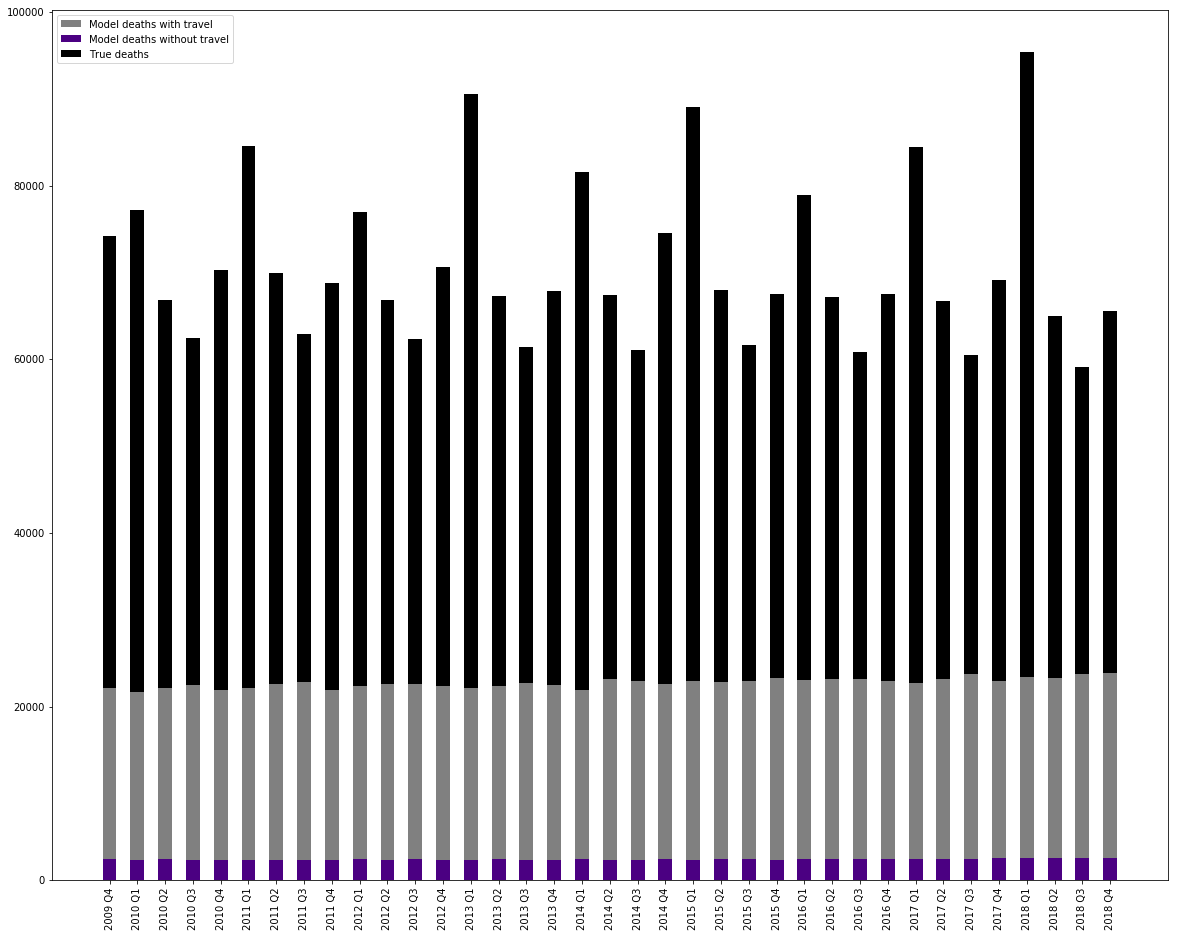

In [146]:
plt.figure(figsize=[20,16])
ind = np.arange(37)
width = 0.5
p1 = plt.bar(ind, deaths_travel_2['total_deaths'], width,
             bottom=deaths_no_travel['total_deaths'], color='grey')
p2 = plt.bar(ind, deaths_no_travel['total_deaths'], width, color='indigo')
#              bottom=menMeans, yerr=womenStd)
p3 = plt.bar(ind, grouped['DeathsFromPneumoniaAndInfluenza'][:-1], width,
             bottom=deaths_travel_2['total_deaths'], color='black')

plt.xticks(ind, ('2009 Q4',
                '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4',
                '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4',
                '2012 Q1', '2012 Q2', '2012 Q3', '2012 Q4',
                '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4',
                '2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4',
                '2015 Q1', '2015 Q2', '2015 Q3', '2015 Q4',
                '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4',
                '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4',
                '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4'), rotation=90)
# plt.yticks(np.arange(0, 81, 10))
# plt.xticks(rotation=70)
plt.legend((p1[0], p2[0], p3[0]), ('Model deaths with travel', 'Model deaths without travel', 'True deaths'))

In [94]:
len(grouped['DeathsFromPneumoniaAndInfluenza'][:-1])

37

In [100]:
grouped['DeathsFromPneumoniaAndInfluenza'][-1]

45254.0

In [172]:
CA_deaths_true = deaths_true[(deaths_true['State'] == 'CA')].groupby(['State', 'Year', 'Quarter']).sum()
CO_deaths_true = deaths_true[(deaths_true['State'] == 'CO')].groupby(['State', 'Year', 'Quarter']).sum()
WY_deaths_true = deaths_true[(deaths_true['State'] == 'WY')].groupby(['State', 'Year', 'Quarter']).sum()

In [173]:
CA_deaths_true = CA_deaths_true['DeathsFromPneumoniaAndInfluenza']
CO_deaths_true = CO_deaths_true['DeathsFromPneumoniaAndInfluenza']
WY_deaths_true = WY_deaths_true['DeathsFromPneumoniaAndInfluenza']

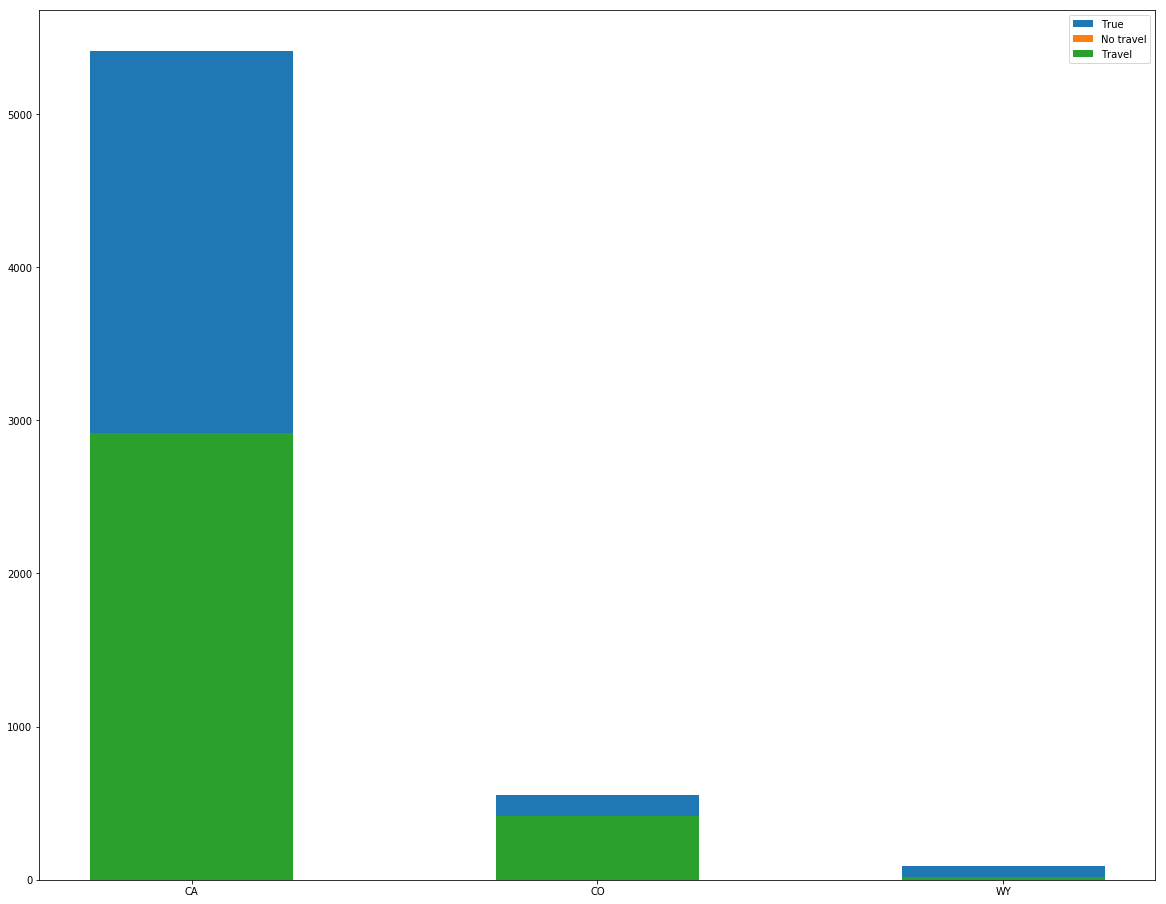

In [186]:
plt.figure(figsize=[20,16])
ind = np.arange(3)
width = 0.5

# CA = [np.mean(CA_deaths_true[:-1]), np.mean(deaths_no_travel['CA']), np.mean(deaths_travel_2['CA'])]
# CO = [np.mean(CO_deaths_true[:-1]), np.mean(deaths_no_travel['CO']), np.mean(deaths_travel_2['CO'])]
# WY = [np.mean(WY_deaths_true[:-1]), np.mean(deaths_no_travel['WY']), np.mean(deaths_travel_2['WY'])]

true = [np.mean(CA_deaths_true[:-1]), np.mean(CO_deaths_true[:-1]), np.mean(WY_deaths_true[:-1])]
no_travel = [np.mean(deaths_no_travel['CA']), np.mean(deaths_no_travel['CO']), np.mean(deaths_no_travel['WY'])]
travel = [np.mean(deaths_travel_2['CA']), np.mean(deaths_travel_2['CO']), np.mean(deaths_travel_2['WY'])]

p1 = plt.bar(ind, true, width)
p2 = plt.bar(ind, no_travel, width)
#              bottom=menMeans, yerr=womenStd)
p3 = plt.bar(ind, travel, width)

plt.xticks(ind, ('CA', 'CO', 'WY'))
# plt.xticks(rotation=70)
plt.legend((p1[0], p2[0], p3[0]), ('True', 'No travel', 'Travel'))